# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [2]:
# to get a list of settable variable properties
# plt.setp(variable)

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
# Uniformly distributed means that the probability of generating a number within 
# any given range of values is proportional to the length of that range
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# print(cities)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 603


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
# i is index number of city in cities list
# enumerate() function iterates over a sequence and generates pairs of (index, fruit) for each element
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        
    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1
    
    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
    # If an error is experienced, skip the city                      
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

# break


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | marcona
City not found. Skipping...
Processing Record 2 of Set 1 | port elizabeth
Processing Record 3 of Set 1 | busselton
Processing Record 4 of Set 1 | mogadishu
Processing Record 5 of Set 1 | maralal
Processing Record 6 of Set 1 | butaritari
Processing Record 7 of Set 1 | narsaq
Processing Record 8 of Set 1 | broken hill
Processing Record 9 of Set 1 | carballo
Processing Record 10 of Set 1 | boralday
Processing Record 11 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 12 of Set 1 | burla
Processing Record 13 of Set 1 | isilkul
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | carnarvon
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | cherskiy
Processing Record 18 of Set 1 | isangel
Processing Record 19 of Set 1 | paita
Processing Record 20 of Set 1 | mrirt
City not found. Skipping...
Processing Record 21 of Set 1 | avarua
Processin

Processing Record 37 of Set 4 | grand gaube
Processing Record 38 of Set 4 | arman
Processing Record 39 of Set 4 | cairns
Processing Record 40 of Set 4 | pevek
Processing Record 41 of Set 4 | shiraoi
Processing Record 42 of Set 4 | mazamari
Processing Record 43 of Set 4 | sanford
Processing Record 44 of Set 4 | muisne
Processing Record 45 of Set 4 | fortuna
Processing Record 46 of Set 4 | olafsvik
Processing Record 47 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 48 of Set 4 | kuche
City not found. Skipping...
Processing Record 49 of Set 4 | coquimbo
Processing Record 0 of Set 5 | fereydunshahr
Processing Record 1 of Set 5 | kuching
Processing Record 2 of Set 5 | karratha
Processing Record 3 of Set 5 | port keats
Processing Record 4 of Set 5 | ucluelet
Processing Record 5 of Set 5 | aklavik
Processing Record 6 of Set 5 | andenes
Processing Record 7 of Set 5 | saryozek
Processing Record 8 of Set 5 | fremont
Processing Record 9 of Set 5 | asuncion
Processing Recor

Processing Record 28 of Set 8 | fort nelson
Processing Record 29 of Set 8 | kvitok
Processing Record 30 of Set 8 | anadyr
Processing Record 31 of Set 8 | kupang
Processing Record 32 of Set 8 | kungurtug
Processing Record 33 of Set 8 | vikhorevka
Processing Record 34 of Set 8 | flin flon
Processing Record 35 of Set 8 | balestrand
Processing Record 36 of Set 8 | hede
Processing Record 37 of Set 8 | lagoa
Processing Record 38 of Set 8 | galgani
City not found. Skipping...
Processing Record 39 of Set 8 | sisimiut
Processing Record 40 of Set 8 | fairlie
Processing Record 41 of Set 8 | pangnirtung
Processing Record 42 of Set 8 | luganville
Processing Record 43 of Set 8 | el sauzal
Processing Record 44 of Set 8 | khonuu
City not found. Skipping...
Processing Record 45 of Set 8 | auckland
Processing Record 46 of Set 8 | kapoeta
Processing Record 47 of Set 8 | kamaishi
Processing Record 48 of Set 8 | roma
Processing Record 49 of Set 8 | beira
Processing Record 0 of Set 9 | gondanglegi
Processin

Processing Record 15 of Set 12 | russell
Processing Record 16 of Set 12 | ratnagiri
Processing Record 17 of Set 12 | damietta
Processing Record 18 of Set 12 | summerville
Processing Record 19 of Set 12 | yuanping
Processing Record 20 of Set 12 | ramasukha
City not found. Skipping...
Processing Record 21 of Set 12 | talaya
Processing Record 22 of Set 12 | shenkursk
Processing Record 23 of Set 12 | palabuhanratu
City not found. Skipping...
Processing Record 24 of Set 12 | gamba
Processing Record 25 of Set 12 | krasnoselkup
Processing Record 26 of Set 12 | pahrump
Processing Record 27 of Set 12 | khandbari
Processing Record 28 of Set 12 | tetiyiv
Processing Record 29 of Set 12 | mareeba
Processing Record 30 of Set 12 | kalmunai
Processing Record 31 of Set 12 | semporna
Processing Record 32 of Set 12 | lerwick
Processing Record 33 of Set 12 | cintalapa
Processing Record 34 of Set 12 | tasbuget
City not found. Skipping...
Processing Record 35 of Set 12 | santander
Processing Record 36 of Se

In [5]:
city_weather

{'coord': {'lon': 108.1, 'lat': 10.9333},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03n'}],
 'base': 'stations',
 'main': {'temp': 21.96,
  'feels_like': 22.3,
  'temp_min': 21.96,
  'temp_max': 21.96,
  'pressure': 1015,
  'humidity': 80,
  'sea_level': 1015,
  'grnd_level': 1014},
 'visibility': 10000,
 'wind': {'speed': 4.2, 'deg': 69, 'gust': 6.15},
 'clouds': {'all': 44},
 'dt': 1678199721,
 'sys': {'country': 'VN', 'sunrise': 1678143589, 'sunset': 1678186684},
 'timezone': 25200,
 'id': 1571058,
 'name': 'Phan Thiet',
 'cod': 200}

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          555
Lat           555
Lng           555
Max Temp      555
Humidity      555
Cloudiness    555
Wind Speed    555
Country       555
Date          555
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port elizabeth,-33.9180,25.5701,24.50,83,20,6.17,ZA,1678198832
1,busselton,-33.6500,115.3333,18.97,46,0,7.59,AU,1678199016
2,mogadishu,2.0371,45.3438,27.64,77,100,9.29,SO,1678198858
3,maralal,1.0968,36.6980,25.35,28,52,8.14,KE,1678199019
4,butaritari,3.0707,172.7902,27.03,80,98,5.39,KI,1678199020


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port elizabeth,-33.9180,25.5701,24.50,83,20,6.17,ZA,1678198832
1,busselton,-33.6500,115.3333,18.97,46,0,7.59,AU,1678199016
2,mogadishu,2.0371,45.3438,27.64,77,100,9.29,SO,1678198858
3,maralal,1.0968,36.6980,25.35,28,52,8.14,KE,1678199019
4,butaritari,3.0707,172.7902,27.03,80,98,5.39,KI,1678199020


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

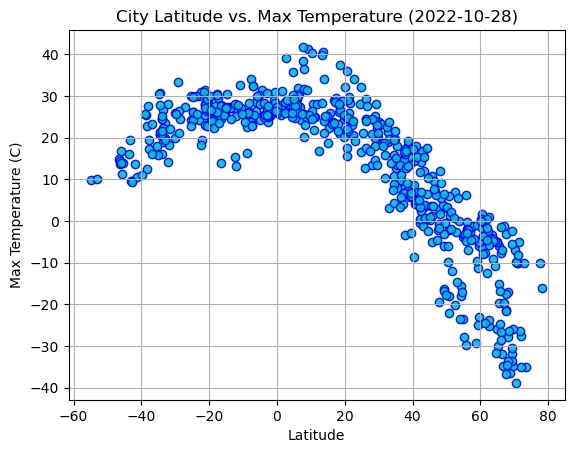

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], color = 'c', edgecolor = 'blue', alpha = 0.9)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Latitude vs. Max Temperature (2022-10-28)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

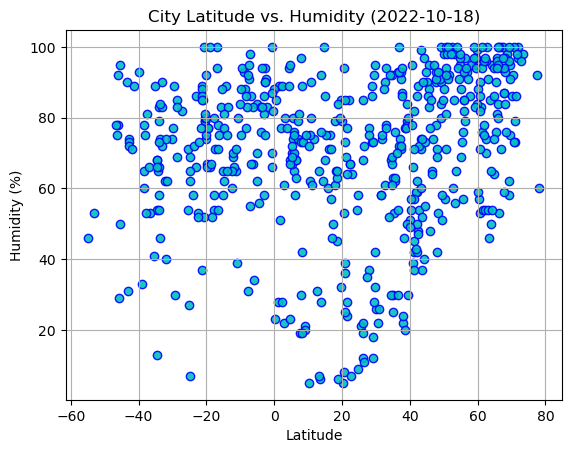

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], color = 'c', edgecolor = 'blue', alpha = 0.9)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (2022-10-18)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

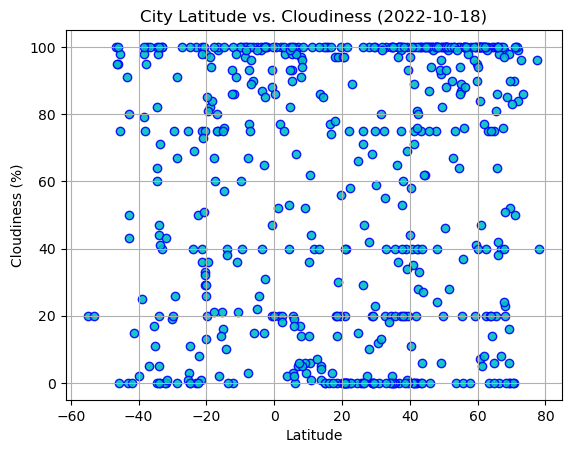

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], color = 'c', edgecolor = 'blue', alpha = 0.9)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (2022-10-18)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

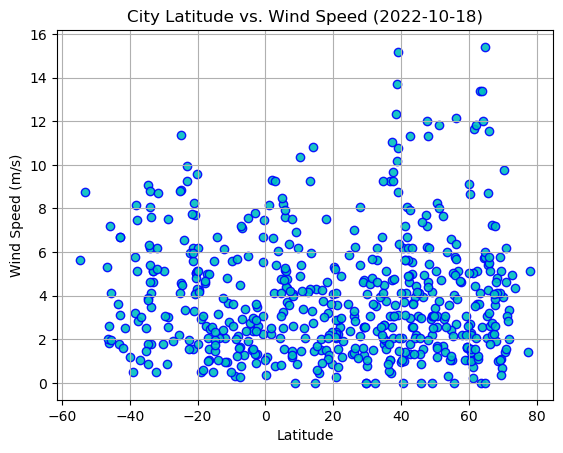

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], color = 'c', edgecolor = 'blue', alpha = 0.9)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed (2022-10-18)')
plt.grid()


# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [14]:
# Define a function to create Linear Regression plots
def linear_regression(x, y, ylabel, title, a, b):
   
    (slope, intercept, r_value, p_value, strerr) = linregress(x, y)
    plt.scatter(x, y)
    plt.xlabel("Latitude")
    plt.ylabel(ylabel)
    plt.title(title)
    fit = (slope * x) + intercept
    plt.plot(x, fit, "r--")
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.annotate(line_eq, fontsize=15, color="red", xy = (a, b))
    print(f"The r-value is: {r_value}")
    

In [15]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,mogadishu,2.0371,45.3438,27.64,77,100,9.29,SO,1678198858
3,maralal,1.0968,36.6980,25.35,28,52,8.14,KE,1678199019
4,butaritari,3.0707,172.7902,27.03,80,98,5.39,KI,1678199020
5,narsaq,60.9167,-46.0500,1.12,83,47,1.05,GL,1678199021
7,carballo,43.2130,-8.6910,16.59,74,100,5.54,ES,1678199023


In [16]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df["Lat"] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port elizabeth,-33.9180,25.5701,24.50,83,20,6.17,ZA,1678198832
1,busselton,-33.6500,115.3333,18.97,46,0,7.59,AU,1678199016
6,broken hill,-31.9500,141.4333,18.34,40,0,6.21,AU,1678199022
11,rikitea,-23.1203,-134.9692,24.26,86,100,9.94,PF,1678199029
12,carnarvon,-24.8667,113.6333,26.13,69,0,8.86,AU,1678199030


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8862710822944568


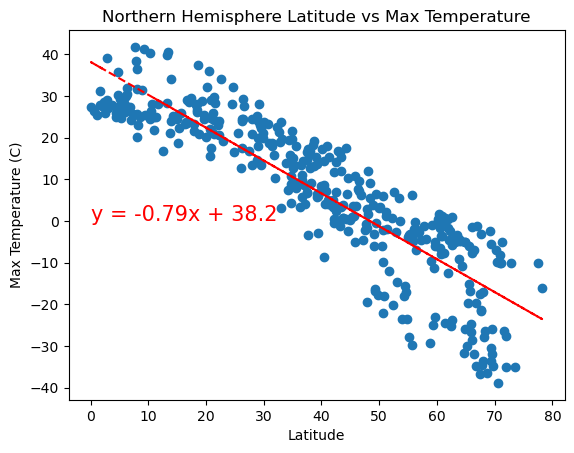

In [17]:
# Linear regression on Northern Hemisphere
linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], "Max Temperature (C)", "Northern Hemisphere Latitude vs Max Temperature", 0, 0)


The r-value is: 0.6120811087877822


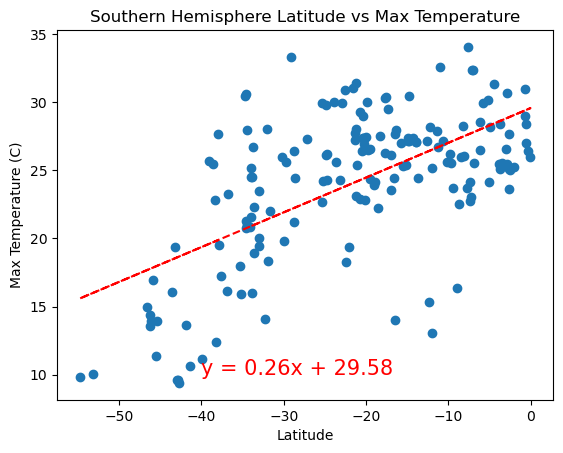

In [18]:
# Linear regression on Southern Hemisphere
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], "Max Temperature (C)", "Southern Hemisphere Latitude vs Max Temperature", -40, 10)


**Discussion about the linear relationship:** 

As illustrated by the graphs above, there is a strong negative correlation (-0.886) between Latitude and Maximum Temperature in the Northern Hemisphere, and a moderate positive correlation (0.612) between the two variables in the Southern Hemisphere. As you move away from the equator, the Maximum Temperature decreases in both Hemispheres. This makes sense because, due to the angle at which sunlight strikes the Earth's surface, equatorial regions receive more direct sunlight, as well as more total sunlight throughout the year, leading to higher temperatures. 

Latitudes in the Northern Hemisphere range from 0 (at the equator) to 80 degrees, while in the Southern Hemisphere, they go from 0 to approximately -55 degrees. The amount of land in the Southern Hemisphere is significantly less than that in the Northern Hemisphere, since most of its surface is covered by water, and landmass is primarily located closer to the equator. Ultimately, consistent with the correlation between Latitude and Maximum Temperature, the range of temperatures in the Northern Hemisphere is also greater than in the Southern Hemisphere. The weaker relationship in the South than the North indicates higher variability in temperature across regions in this Hemisphere, which is reflected in the graph. Some possible factors that might contribute to this variation include ocean currents, which can also impact temperatures in adjacent land areas, and the presence of large mountain ranges in the Southern Hemisphere, which affect precipitation and air flow, and can create distinct temperature patterns.


### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.40895306570005663


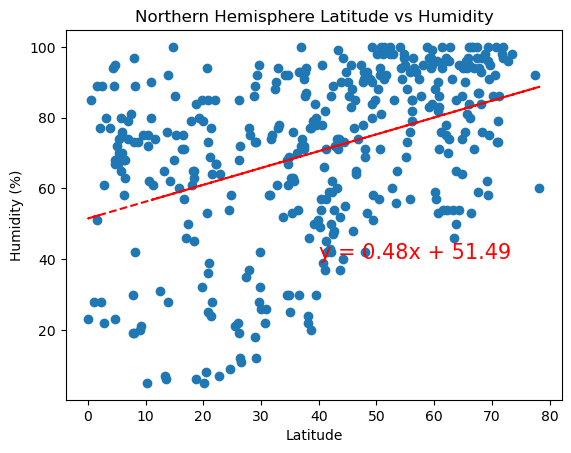

In [19]:
# Northern Hemisphere
linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], "Humidity (%)", "Northern Hemisphere Latitude vs Humidity", 40, 40)


The r-value is: 0.2639646319764896


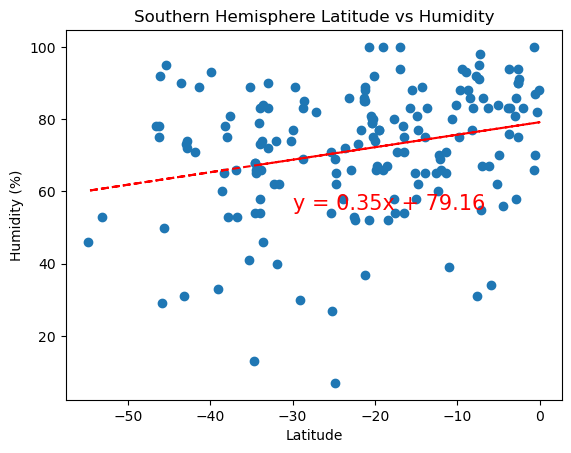

In [20]:
# Southern Hemisphere
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], "Humidity (%)", "Southern Hemisphere Latitude vs Humidity", -30, 55)


**Discussion about the linear relationship:** 

Looking at the Latitude vs Humidity graphs above, we can see that there is a positive correlation between the two factors in both sides of the equator. The relationship is weak (0.409) in the Northern Hemisphere, and very weak (0.264) in the Southern correlation. This indicates that humidity increases in the Northern Hemisphere as the angular distance from the equator increases, while in the Southern Hemisphere, humidity decreases in higher latitudes, considering a very weak relationship. The higher levels of humidity near the equator is consistent with the fact that these regions receive more direct and concentrated sunlight, leading to higher levels of evaporation. Water vapor rises into the atmosphere, increasing the humidity.


### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.19358843238610612


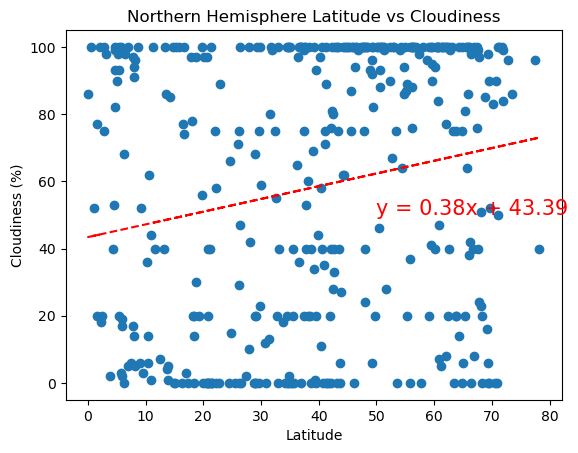

In [21]:
# Northern Hemisphere
linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], "Cloudiness (%)", "Northern Hemisphere Latitude vs Cloudiness", 50, 50)


The r-value is: 0.20085967321007495


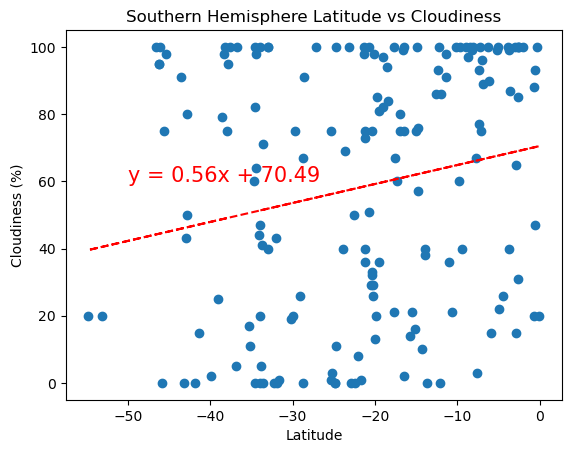

In [22]:
# Southern Hemisphere
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], "Cloudiness (%)", "Southern Hemisphere Latitude vs Cloudiness", -50, 60)


**Discussion about the linear relationship:** 

According to the Latitude vs Cloudiness graphs, the relationship between these two factors is very weak to non-existent in both Hemispheres (0.193, and 0.201 in the Northern, and Southern Hemispheres, respectively). Considering that the data reflects a sample of cities across the world, the very small r-value likely indicate no relationship. In equatorial regions, there is a concentration of cities experiencing 100% cloudiness, but not a significant amount of places with very low cloudiness. This is likely correlated to the higher temperatures and humidity in equatorial regions, which cause warm moist air to rise, forming clouds that produce frequent rainfall. In the Northern Hemisphere, we can see that several cities experience either 100% or 0% cloudiness, but there is considerable variation in the Cloudiness percentage across regions within the same latitude, in both Hemispheres.



### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.045162256414475896


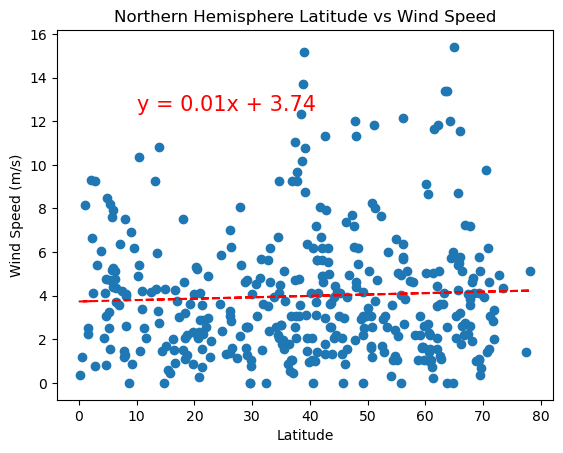

In [23]:
# Northern Hemisphere
linear_regression(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], "Wind Speed (m/s)", "Northern Hemisphere Latitude vs Wind Speed", 10, 12.5)


The r-value is: -0.20007227808988262


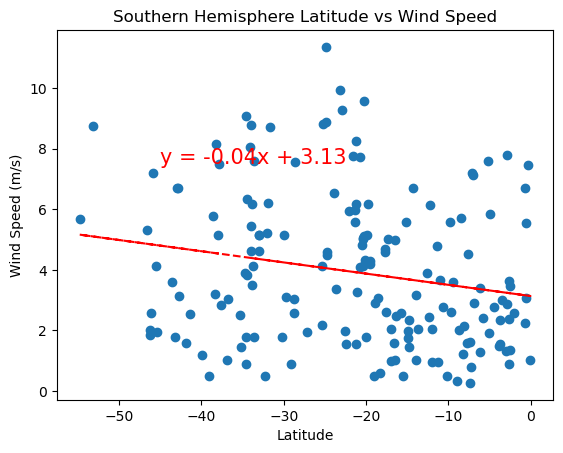

In [24]:
# Southern Hemisphere
linear_regression(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], "Wind Speed (m/s)", "Southern Hemisphere Latitude vs Wind Speed", -45, 7.5)


**Discussion about the linear relationship:** 

Based on the r-value for the graphs above, there is no relationship between Latitude and Wind Speed. This makes sense because several factors contribute to wind speed in a region, including temperature, atmospheric pressure, humidity and topography. Since the data reflects a sample of cities across the world, the r-value of -0.2 in the Southern Hemisphere cannot be used to conclude that there is a very weak relationship, which would indicate that wind speeds increase as the angular distance from the equator increases. As shown in the graphs, most cities experience a Wind Speed of 0 to 6 m/s in both Hemispheres. 
